In [1]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define the path to the checkpoint and the model type
checkpoint_path = "checkpoints/sam_checkpoint.pth"  # Path to the downloaded checkpoint
model_type = "default"  # Replace with the actual model type, e.g., "default"

# Load the model
sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
mask_generator = SamAutomaticMaskGenerator(sam)


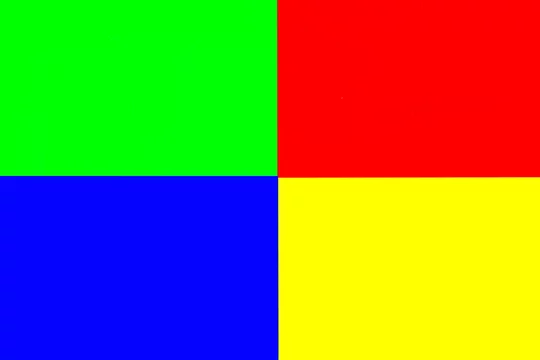

In [7]:
# Load your image
image_path = "images/colors.jpg"  # Path to your image file
image = Image.open(image_path)
image_np = np.array(image)
image


In [8]:
# Generate masks
masks = mask_generator.generate(image_np)

# Inspect the structure of masks
print(type(masks))
print(len(masks))
print(masks[0].keys())  # Print keys of the first mask dictionary


<class 'list'>
6
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


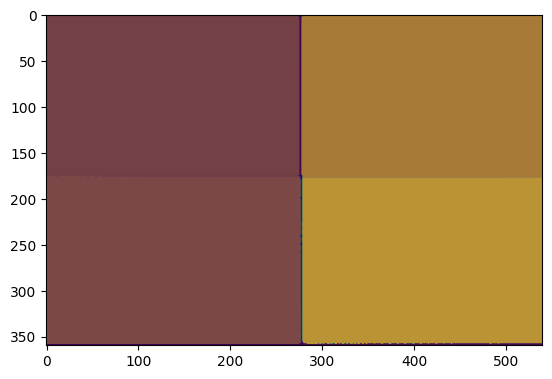

In [9]:
# Output or save the masks as needed
for i, mask_dict in enumerate(masks):
    mask = mask_dict['segmentation']  # Replace 'segmentation' with the actual key if different
    mask_image = Image.fromarray(mask.astype(np.uint8) * 255)
    mask_image.save(f"mask_{i}.png")

# Optionally, visualize the results
plt.imshow(image)
for mask_dict in masks:
    mask = mask_dict['segmentation']  # Replace 'segmentation' with the actual key if different
    plt.imshow(mask, alpha=0.5)  # Adjust alpha for transparency
plt.show()


In [10]:
from segment_anything import SamPredictor, sam_model_registry
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Define the path to the checkpoint and the model type
checkpoint_path = "checkpoints/sam_checkpoint.pth"  # Path to the downloaded checkpoint
model_type = "default"  # Replace with the actual model type, e.g., "default"

# Load the model
sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
predictor = SamPredictor(sam)


In [12]:
# Load your image
image_path = "images/flower.jpg"  # Path to your image file
image = Image.open(image_path)
image_np = np.array(image)

# Set the image in the predictor
predictor.set_image(image_np)


In [13]:
# Example: Provide points as prompts
# Replace with actual coordinates from your image
input_points = np.array([[200, 250], [210, 260], [300, 300], [100, 200]])  # Example coordinates
input_labels = np.array([1, 1, 1, 0])  # 1 for foreground, 0 for background

# Generate masks
masks, _, _ = predictor.predict(point_coords=input_points, point_labels=input_labels)

# Inspect the structure of masks
print(type(masks))
print(masks.shape)


<class 'numpy.ndarray'>
(3, 413, 735)


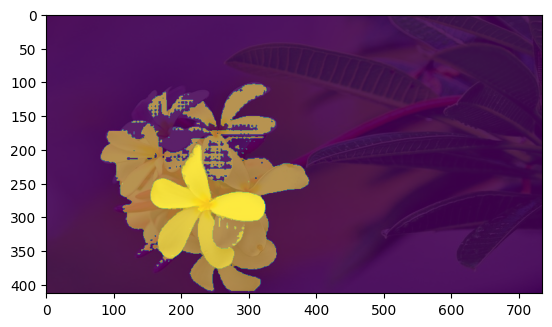

In [14]:
# Output or save the masks as needed
for i, mask in enumerate(masks):
    mask_image = Image.fromarray(mask.astype(np.uint8) * 255)
    mask_image.save(f"mask_{i}.png")

# Optionally, visualize the results
plt.imshow(image)
for mask in masks:
    plt.imshow(mask, alpha=0.5)  # Adjust alpha for transparency
plt.show()
